# Predicting Global Cotton Production Based on Apparel Companies' Revenues per Year

# Overview

In this project, our goal was to find whether a correlation exists between the success of the fast fashion industry and global cotton production. We measured company success through yearly revenue and cotton production through millions of bales produced yearly. Using a linear regression model, we looked at the relationship between global cotton production and both the average revenue of fast fashion companies and the average revenue of all apparel companies. Ultimately, we found that the yearly average revenue for all apparel companies is a stronger predictor for global cotton production than that of fast fashion companies.

# Names
    
   - Amanda Ahn 
   - Hannah Contreras
   - Bella Liang
   - Yelitza Mendez
   - Sarah Nobleza

# Research Question

Does the success of U.S. fast fashion companies have an effect on global cotton production over time?

# Background and Prior Work

The relationship between the fast fashion industry and its supply chain sparked my group’s interest when we noticed the normalization of its practices within our society. From constant social media advertisements promoting cheaply made clothing to our own desire to purchase trendy affordable attire, it is evident that the negative consequences of the fast fashion industry remain unnoticed by consumers. The business model that is fast fashion produces products to have a short life cycle and are typically made through unethical and unsustainable practices <sub>1</sub>. While fast fashion clothing is affordable to its consumers, it has a detrimental cost to our environment and the workers involved in its supply chain. Although an article of clothing goes through many stages from crop cultivation to landing in a department store, we decided to focus on the stage of cotton production.

Cotton is one of the most widely used materials in the production of clothing, which has led to increasingly high demand for it as the fast fashion industry has risen <sub>2</sub>. As clothing companies are producing more clothes at a cheaper price, they are demanding an increasing amount of cotton for a very low price. The price of cotton has remained low but the cost to produce has risen-- this negatively affects cotton farmers and their families. These farmers have been suffering great losses including not being able to afford basic needs for their families <sub>2</sub>. Along with the strenuous work that cotton farmers put in without a livable wage, they also put their health at risk everyday. Cotton cultivation calls for many types of pesticides that have not been tested for long-term health consequences <sub>3</sub>. By looking at the relationship between the success of fast fashion brands and the production of cotton, we hope to shed light on this important issue to consumers. The only way that the business model of fast fashion will improve is if consumers demand for change and use their power that comes with choosing which brands to buy from. 

With that, we believe that global cotton production will be most affected by the fast fashion industry beginning in the 1990s<sub>4</sub>. During this time, many apparel companies began adopting fashion fashion practices, including creating new lines of clothing constanly to keep up with changing trends, producing clothes cheaply to keep costs low, and outsourcing many stages of the production process to foreign countries. We have included data from 1980-2011 to see if our models predict this trend. 

#### References
   1. https://www.sciencedirect.com/topics/engineering/fast-fashion
   2. https://www.fairtrade.org.uk/media-centre/blog/the-true-cost-of-fast-fashion/
   3. https://truecostmovie.com/larhea-pepper-interview
   4. https://en.wikipedia.org/wiki/Fast_fashion


# Hypothesis

We hypothesize that as the revenue of the fast fashion companies increases, the production of global cotton will also increase as time passes. In particular, we project that:
- the revenue in fast fashion will significantly increase beginning in the 1990s because this was when fast fashion practices started to emerge and companies began profiting from such practices
- the global production of cotton will significantly increase beginning in the 1990s because fast fashion practices require more cotton to meet the demand of clothing production
   
## Null hypothesis
There is no significant increase in global cotton production as the average apparel companies' revenues increase. 

## Alternative hypothesis
There is a significant increase in the global cotton production as the average apparel companies' revenues increase. 


# Datasets

For our research question, we used a total of 33 datasets from Fortune magazine’s Fortune 500 ranked lists and USDA ERS Cotton and Wool Yearbook Archive. 

## Fortune 500 Datasets
Of the 33 datasets, 32 were retrieved from Fortune magazine to gather the revenue data of the top corporations from years 1980 to 2011.

Link to datasets:
- https://fortune.com/fortune500/2020/search
- https://github.com/cmusam/fortune500/tree/master/csv

Each dataset has 500 rows of observations and 4 columns. 

They contain a list of the top 500 companies in the United States for a specific year, along with their respective values for the following variables:
- Rank 
- Revenues in millions of dollars 
- Profits in millions of dollars 
    
Data types:
- Company names - strings 
- Ranks - ints
- Revenues - floats 
- Profits - floats
    
For our particular research, we will only be looking at the company names and their revenues. In order to extract the data necessary for our research question, we sorted through each of the 32 datasets to find strictly the apparel companies and compiled each year with only apparel companies and their revenues into one dataset. 

## Global Cotton Dataset

The remaining dataset was retrieved from USDA ERS to gather information on exact global cotton production from years 1980 to 2011.

Link to dataset:
- https://www.ers.usda.gov/data-products/cotton-wool-and-textile-data/cotton-and-wool-yearbook-archive/

This dataset has 46 rows of observations and 7 columns.

It contains a list of the following variables all between the years 1965 and 2011 from around the world: 
   - Harvested area of cotton in millions ha
   - Cotton yield in kg/ha 
   - Beginning stocks in million 480-lb bales
   - Cotton production in million 480-lb bales
   - Cotton disappearance in million 480-lb bales
   - Cotton exports in million 480-lb bales 

Data types:
   - Year - ints
   - Cotton harvested - floats 
   - Cotton yield - ints
   - Beginning stocks - floats
   - Cotton production - floats
   - Cotton disappearance - floats
   - Cotton exports - floats
   
   
<p>We will be specifically looking at cotton production variables per year. We then compiled the simplified dataset from Fortune 500 with this cotton dataset to create our final dataset.

<p>We modified our research question from the one we had presented in our project proposal; therefore, our previous ideal datasets are relatively different from the datasets we used for our research. It would have been ideal to have fashion datasets that only included the top apparel companies with their revenues, and cotton datasets that recorded which companies received which countries’ cotton imports from. However, we were able to separate the companies by industry through code, which eliminated any complications, and we researched where the majority of the fast fashion companies source their cotton from. Since almost all fast fashion companies source their cotton from around the world, we picked the global cotton dataset. Overall, our current datasets are the closest relevant datasets to our ideal datasets. <p>

# Setup

In [1]:
import pandas as pd
import numpy as np

from statistics import mean

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

Before we begin our data analysis, we need to clean our datasets to get them into the more easily usable "tidy data" format. That is, we want our data to 1) have each variable be in a single column, 2) include each observation in its own row, 3) have one table for each type of data, and 4) include a column for merging if we have multiple tables. Ultimately, we want our data to be rectangle, with no missing data.

## Cleaning Fortune 500 Data

The Fortune 500 datasets, in their current state, are already in the tidy data format. However, there are variables that are not important to our research question. Additionally, because we are only interested in looking at apparel companies, many observations in the datasets are also irrelevant. So, our goal with cleaning the Fortune 500 data is to add columns to identify apparel companies and fast fashion companies and drop all the observations that are non-apparel companies.

Our plan for cleaning the Fortune 500 data is as follows:

1. Create lists of apparel and non-apparel companies from 1996 to 2006
2. Use this list of non-apparel companies to drop non-apparel companies from 1980 to 1995 and 2007 to 2011
3. Add additional apparel companies from the Fortune 500 website that were not in the csv files
4. Label the apparel companies that are considered fast fashion according to our criteria

To do this, we will first load in all the Fortune 500 csv files (from 1980 to 2011) into this notebook as DataFrames, rename the columns, drop the 'rank' and 'profit' column, and add the 'isApparel' column.

In [2]:
# load in all fortune 500 csv files
df_80 = pd.read_csv('fortuneFiles/fortune500-1980.csv')
df_81 = pd.read_csv('fortuneFiles/fortune500-1981.csv')
df_82 = pd.read_csv('fortuneFiles/fortune500-1982.csv')
df_83 = pd.read_csv('fortuneFiles/fortune500-1983.csv')
df_84 = pd.read_csv('fortuneFiles/fortune500-1984.csv')
df_85 = pd.read_csv('fortuneFiles/fortune500-1985.csv')
df_86 = pd.read_csv('fortuneFiles/fortune500-1986.csv')
df_87 = pd.read_csv('fortuneFiles/fortune500-1987.csv')
df_88 = pd.read_csv('fortuneFiles/fortune500-1988.csv')
df_89 = pd.read_csv('fortuneFiles/fortune500-1989.csv')
df_90 = pd.read_csv('fortuneFiles/fortune500-1990.csv')
df_91 = pd.read_csv('fortuneFiles/fortune500-1991.csv')
df_92 = pd.read_csv('fortuneFiles/fortune500-1992.csv')
df_93 = pd.read_csv('fortuneFiles/fortune500-1993.csv')
df_94 = pd.read_csv('fortuneFiles/fortune500-1994.csv')
df_95 = pd.read_csv('fortuneFiles/fortune500-1995.csv')
df_96 = pd.read_csv('fortuneFiles/fortune500-1996.csv')
df_97 = pd.read_csv('fortuneFiles/fortune500-1997.csv')
df_98 = pd.read_csv('fortuneFiles/fortune500-1998.csv')
df_99 = pd.read_csv('fortuneFiles/fortune500-1999.csv')
df_00 = pd.read_csv('fortuneFiles/fortune500-2000.csv')
df_01 = pd.read_csv('fortuneFiles/fortune500-2001.csv')
df_02 = pd.read_csv('fortuneFiles/fortune500-2002.csv')
df_03 = pd.read_csv('fortuneFiles/fortune500-2003.csv')
df_04 = pd.read_csv('fortuneFiles/fortune500-2004.csv')
df_05 = pd.read_csv('fortuneFiles/fortune500-2005.csv')
df_06 = pd.read_csv('fortuneFiles/fortune500-2006.csv')
df_07 = pd.read_csv('fortuneFiles/fortune500-2007.csv')
df_08 = pd.read_csv('fortuneFiles/fortune500-2008.csv')
df_09 = pd.read_csv('fortuneFiles/fortune500-2009.csv')
df_10 = pd.read_csv('fortuneFiles/fortune500-2010.csv')
df_11 = pd.read_csv('fortuneFiles/fortune500-2011.csv')

In [3]:
# rename columns, drop rank and profit, add isApparel for EVERY YEAR
df_all = [df_80, df_81, df_82, df_83, df_84, df_85, df_86, df_87, df_88, df_89, df_90, df_91, 
          df_92, df_93, df_94, df_95, df_96, df_97, df_98, df_99, df_00, df_01, df_02, df_03, 
          df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11]

for df in df_all:
    df.columns = ['rank', 'company', 'revenue', 'profit']
    df.drop(['rank'], axis=1, inplace=True)
    df.drop(['profit'], axis=1, inplace=True)
    df['isApparel'] = 0

### Step 1: Create Apparel and Non-apparel Lists

Although these csv files do not have information about which industry each company belongs to, we referenced the Fortune 500 website (https://fortune.com/fortune500/1996/search/?industry=Apparel) which allows us to filter through the companies in different industries from 1996 to 2006. From this view, we gathered a list of apparel companies from 1996 to 2006 that we can use to preliminarily flag the apparel companies in our DataFrames.

In [4]:
# flag apparel companies using list from Fortune 500 website
apparel = ['Fruit of the Loom', 'Liz Claiborne', 'Kellwood', 'Russell', 'Warnaco Group', 
           'Jones Apparel Group', 'Nine West Group', 'Pillowtex', 'Polo Ralph Lauren', 
           'Phillips-Van Heusen', 'Reebok International', 'Timberland', 'Quiksilver', 
           'Levi Strauss', 'VF', 'Nike']

for df in df_all:
    for i in range(len(df)):
        if df.loc[i, 'company'] in apparel:
            df.loc[i, 'isApparel'] = 1

We can see from the DataFrame below that our columns are in the format we want, the isApparel column has been added, and the apparel companies from the list above have been flagged.

In [5]:
df_96.loc[df_96['isApparel'] == 1]

,company,revenue,isApparel
197,Levi Strauss,6707.6,1
263,VF,5062.3,1
276,Nike,4760.8,1
354,Reebok International,3481.5,1


Now that we have started creating a list of all apparel companies (in the list `apparel`), we can also begin to compile the names of all non-apparel companies (`non-apparel`) in our DataFrames. Ultimately, we will use these two lists to identify all apparel companies and drop all non-apparel companies in our DataFrames. Below, we also dropped all the non-apparel companies from 1996 to 2006.

In [6]:
df_96_06 = [df_96, df_97, df_98, df_99, df_00, df_01, df_02, df_03, df_04, df_05, df_06]

# create non-apparel list
non_apparel = []

for df in df_96_06:
    for i in range(len(df)):
        if df.loc[i, 'isApparel'] == 0:
            non_apparel.append(df.loc[i, 'company'])

# drop all non-apparel companies from 1996 - 2006
for df in df_96_06:
    df.drop(df[df['isApparel'] == 0].index, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
# remove duplicates
non_apparel = list(set(non_apparel))

### Step 2: Drop Non-apparel Companies from 1980 - 1995 and 2007 - 2011

Knowing that each of our DataFrames have at least 500 entries, it would be very time inefficient to manually flag all the apparel companies, we first drop the companies that we know are non-apparel from all our DataFrames first.

In [7]:
df_other = [df_80, df_81, df_82, df_83, df_84, df_85, df_86, df_87, df_88, df_89, df_90, df_91, 
            df_92, df_93, df_94, df_95, df_07, df_08, df_09, df_10, df_11]

for df in df_other:
    for i in range(len(df)):
        name = df.loc[i, 'company']
        if name in non_apparel:
            df.drop(i, inplace=True)
    df.reset_index(drop=True, inplace=True)

After dropping some of the non-apparel companies, each DataFrame has much less than 500 entries. We decided to manually flag the apparel companies from 1980, then add the additional non-apparel companies from 1980 to the existing `non-apparel` list in order to drop more rows from the remaining DataFrames. After this round of cleaning, each remaining DataFrame has only about 20 entries each, which we manually flagged for remaining apparel companies.

In [8]:
# CLEANING 1980

# check all rows with isApparel == 0
df_80.sort_values(by=['isApparel', 'revenue'], ascending=False)

,company,revenue,isApparel
37,Fruit of the Loom,2579.0,1
54,Levi Strauss,2103.1,1
244,VF,544.3,1
250,Kellwood,521.1,1
286,Warnaco Group,448.3,1
...,...,...,...
305,Stanadyne,415.4,0
306,Capital Cities/ABC,414.9,0
307,Kohler,413.7,0
308,Keystone Consolidated Industries,412.3,0


In [9]:
# apparel companies from 1980
apparel_80 = ['United Merchants & Mfrs.', 'Cone Mills', 'Cluett Peabody', 'M. Lowenstein', 
              'Hartmarx', 'Jonathan Logan', 'Gerber Products']

apparel = apparel + apparel_80

# flag apparel and drop non-apparel
for i in range(len(df_80)):
    if df_80.loc[i, 'company'] in apparel:
            df_80.loc[i, 'isApparel'] = 1
    elif df_80.loc[i, 'company'] not in apparel:
        df_80.drop(i, inplace=True)
        
df_80.reset_index(drop=True, inplace=True)

From the remaining DataFrames (1981 - 1995, 2007 - 2011), we flagged the apparel companies listed below. We added the list of new apparel companies to the existing `apparel` list and dropped all the entries with companies that are not in this list.

In [10]:
# flag remaining apparel companies
apparel_remain = ['Genesco', 'Leslie Fay', 'Guilford Mills', 'JPS Textile Group', 
                  'Gitano Group', 'United States Shoe']

apparel = apparel + apparel_remain

# drop non-apparel from all remaining years
for df in df_other:
    for i in range(len(df)):
        if df.loc[i, 'company'] in apparel:
            df.loc[i, 'isApparel'] = 1
        elif df.loc[i, 'company'] not in apparel:
            df.drop(i, inplace=True)
    df.reset_index(drop=True, inplace=True)

At this point, the DataFrame for each year we're including in our analysis (1980 - 2011) only includes apparel companies.

### Step 3: Add Apparel Comapnies from Fortune 500 Website

While looking through Fortune 500 rankings website for the years available on this website, we noticed that their list includes companies up to rank 1000 instead of stopping at 500. Because our analysis will make use of average revenue for companies each year instead of the total absolute revenue, we think that it is appropriate to add the additional apparel companies to our DataFrame for a more thorough analysis.

In [11]:
# added additional apparel companies from the Fortune 500 website that weren't on the csv files
columns = ['company', 'revenue', 'isApparel']
add_df = pd.DataFrame([['Fruit of the Loom', 2043.1, 1], ['Liz Claiborne', 2081.6, 1], ['Kellwood', 1364.8, 1], 
                       ['Russell', 1152.6, 1], ['Warnaco Group', 916.2, 1]], columns=columns)
df_96 = df_96.append(add_df)
add_df = pd.DataFrame([['Fruit of the Loom', 2447.4, 1], ['Liz Claiborne', 2217.5, 1], ['Kellwood', 1466.0, 1], 
                       ['Russell', 1244.2, 1], ['Warnaco Group', 1063.8, 1], ['Jones Apparel Group', 1021.0, 1]], 
                      columns=columns)
df_97 = df_97.append(add_df)
add_df = pd.DataFrame([['Liz Claiborne', 2412.6, 1], ['Fruit of the Loom', 2139.9, 1], ['Nine West Group', 1865.3, 1], 
                       ['Kellwood', 1521.0, 1], ['Warnaco Group', 1435.7, 1], ['Jones Apparel Group', 1387.5, 1], 
                       ['Russell', 1387.5, 1]], columns=columns)
df_98 = df_98.append(add_df)
add_df = pd.DataFrame([['Liz Claiborne', 2535.3, 1], ['Fruit of the Loom', 2170.3, 1], ['Warnaco Group', 1950.3, 1], 
                       ['Nine West Group', 1916.7, 1], ['Kellwood', 1781.6, 1], ['Jones Apparel Group', 1685.2, 1], 
                       ['Pillowtex', 1509.8, 1], ['Polo Ralph Lauren', 1470.9, 1], ['Phillips-Van Heusen', 1303.1, 1], 
                       ['Russell', 1180.1, 1]], columns=columns)
df_99 = df_99.append(add_df)
add_df = pd.DataFrame([['Reebok International', 2899.9, 1], ['Liz Claiborne', 2806.5, 1], ['Kellwood', 2151.1, 1], 
                       ['Warnaco Group', 2114.2, 1], ['Polo Ralph Lauren', 1726.9, 1], 
                       ['Phillips-Van Heusen', 1271.5, 1]], columns=columns)
df_00 = df_00.append(add_df)
add_df = pd.DataFrame([['Liz Claiborne', 3104.1, 1], ['Reebok International', 2865.0, 1], ['Kellwood', 2362.2, 1], 
                       ['Warnaco Group', 2309.3, 1], ['Polo Ralph Lauren', 1955.5, 1], 
                       ['Phillips-Van Heusen', 1455.5, 1], ['Russell', 1217.6, 1]], columns=columns)
df_01 = df_01.append(add_df)
add_df = pd.DataFrame([['Reebok International', 2992.9, 1], ['Kellwood', 2281.8, 1], ['Polo Ralph Lauren', 2225.8, 1], 
                       ['Phillips-Van Heusen', 1431.9, 1], ['Timberland', 1183.6, 1]], columns=columns)
df_02 = df_02.append(add_df)
add_df = pd.DataFrame([['Polo Ralph Lauren', 2225.8, 1], ['Kellwood', 2281.8, 1], ['Phillips-Van Heusen', 1431.9, 1], 
                       ['Timberland', 1183.6, 1], ['Warnaco Group', 1549.4, 1], ['Russell', 1164.3, 1]], 
                      columns=columns)
df_03 = df_03.append(add_df)
add_df = pd.DataFrame([['Polo Ralph Lauren', 2439.3, 1], ['Kellwood', 2397.6, 1], ['Phillips-Van Heusen', 1582.0, 1], 
                       ['Warnaco Group', 1447.8, 1], ['Timberland', 1342.1, 1]], columns=columns)
df_04 = df_04.append(add_df)
add_df = pd.DataFrame([['Polo Ralph Lauren', 2649.7, 1], ['Kellwood', 2555.7, 1], ['Phillips-Van Heusen', 1641.4, 1], 
                       ['Timberland', 1500.6, 1], ['Warnaco Group', 1441.7, 1]], columns=columns)
df_05 = df_05.append(add_df)
add_df = pd.DataFrame([['Polo Ralph Lauren', 3305.4, 1], ['Kellwood', 2351.4, 1], ['Phillips-Van Heusen', 1908.8, 1], 
                       ['Quiksilver', 1780.9, 1], ['Timberland', 1565.7, 1], ['Warnaco Group', 1504.6, 1], 
                       ['Russell', 1424.6, 1]], columns=columns)
df_06 = df_06.append(add_df)

### Step 4: Label Fast Fashion Apparel Companies

Because we're interested in the correlation between the success of fast fashion companies and global cotton production, it is necessary for our data to have labels for fast fashion companies. The criteria we used to determine if an apparel company is considered "fast fashion" is:

- if the company has not indicated that it creates sustainable clothing
- if the company produces clothing from firms in other countries, especially in third-world countries

We gathered information about the apparel companies from Wikipedia, Funding Universe (http://www.fundinguniverse.com/company-histories/), and SourceWatch (https://www.sourcewatch.org/index.php?title=SourceWatch).

In [12]:
# label fast fashion companies in new column
df_all = [df_80, df_81, df_82, df_83, df_84, df_85, df_86, df_87, df_88, df_89, df_90, df_91, 
          df_92, df_93, df_94, df_95, df_96, df_97, df_98, df_99, df_00, df_01, df_02, df_03, 
          df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11]

fast_fashion = ['Warnaco Group', 'Nike', 'Kellwood', 'Leslie Fay', 
                'Russell', 'Levi Strauss', 'Fruit of the Loom', 
                'Quicksilver', 'Liz Claiborne']

for df in df_all:
    df.reset_index(drop=True, inplace=True)
    df['isFastFashion'] = 0
    for i in range(len(df)):
        if df.loc[i, 'company'] in fast_fashion:
            df.loc[i, 'isFastFashion'] = 1

The data from the Fortune 500 files are now clean and tidy. It includes only the columns with the necessary information for our analysis. Below is the DataFrame for 1980 as an example.

In [13]:
df_80.head()

,company,revenue,isApparel,isFastFashion
0,Fruit of the Loom,2579.0,1,1
1,Levi Strauss,2103.1,1,1
2,United Merchants & Mfrs.,699.8,1,0
3,Cone Mills,681.3,1,0
4,Cluett Peabody,671.6,1,0


## Cleaning Global Cotton Data

The global cotton dataset is not currenty considered "tidy" because it has many null values from the empty cells. We first dropped all the empty columns and rows and dropped the columns that are not used in our analysis. Then, we fixed two entries for the years 2010 and 2011 because of inconsistent formatting. Finally, we changed the datatype for all columns to be numeric.

In [14]:
df_cotton15 = pd.read_csv('Table-15.csv')

# rename columns and drop unnessary columns
df_cotton15.columns = ['Year', 'Harvested', 'Yield', 'Beginning_Stocks', 'Cotton_Production', 
                       'Disappearance', 'Exports', '', '', '', '', '', '', '', '', '', 
                       '', '', '', '', '']
df_cotton15 = df_cotton15[['Year', 'Harvested', 'Yield', 'Cotton_Production', 
                           'Disappearance', 'Exports']]

# drop header row and rows with NaN
df_cotton15 = df_cotton15.dropna()
df_cotton15 = df_cotton15.drop(df_cotton15.index[0], axis=0)

# reset index
df_cotton15 = df_cotton15.reset_index(drop=True)

# fix year 2010 and 2011 values
df_cotton15.loc[45, 'Year'] = '2010'
df_cotton15.loc[46, 'Year'] = '2011'


# change data types to numeric
df_cotton15[['Year', 'Harvested', 'Yield', 'Cotton_Production', 'Disappearance', 
             'Exports']] = df_cotton15[['Year', 'Harvested', 'Yield', 'Cotton_Production', 
                                        'Disappearance', 'Exports']].apply(pd.to_numeric)

# drop other unnecessary columns
df_cotton15 = df_cotton15[['Year', 'Cotton_Production']]

After this cleaning, we can see that the DataFrame has no null values, only the data we need, and is in a rectangular format. Now that it is in the tidy data format, it is ready to use.

In [15]:
df_cotton15.head()

,Year,Cotton_Production
0,1965,56.9
1,1966,52.3
2,1967,51.6
3,1968,56.9
4,1969,54.3


## Combining Fortune 500 and Cotton Data into one DataFrame

We decided to merge the Fortune 500 and the global cotton DataFrames to easily access the data in our data analysis. We created several new columns for the data for each year:

- `Apparel_Count`: total apparel companies on the Fortune 500 list each year
- `Fast_Fashion_Count`: total fast fashion apparel companies on the Fortune 500 list each year
- `Total_Apparel_Revenue`: total revenue of apparel companies on Fortune 500 each year
- `Total_Fast_Fashion_Revenue`: total revenue of fast fashion apparel companies on Fortune 500 each year
- `Average_Apparel_Revenue`: average revenue of apparel companies each year
- `Average_Fast_Fashion_Revenue`: average revenue of fast fashion apparel companies each year

In [16]:
df_all = [df_80, df_81, df_82, df_83, df_84, df_85, df_86, df_87, df_88, df_89, df_90, df_91, 
          df_92, df_93, df_94, df_95, df_96, df_97, df_98, df_99, df_00, df_01, df_02, df_03, 
          df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11]

# Apparel_Count
year = 1980
apparel_count = {}
for df in df_all:
    total = sum(df['isApparel']==1)
    apparel_count[year] = total
    year = year +1
df_apparel_count = pd.DataFrame(list(apparel_count.items()))
df_apparel_count.columns = ['Year', 'Apparel_Count'] 
df_apparel_count

# Fast_Fashion_Count
year = 1980
ff_count = {}
for df in df_all:
    total = sum(df['isFastFashion'] == 1)
    ff_count[year] = total
    year = year + 1
df_ff_count = pd.DataFrame(list(ff_count.items()))
df_ff_count.columns = ['Year', 'Fast_Fashion_Count']

# Total_Apparel_Revenue
year = 1980
apparel_revenue = {}
for df in df_all:
    total = 0
    for i in range(len(df)):
        total = total + df.loc[i, 'revenue']
    apparel_revenue[year] = total
    year = year + 1
df_apparel_revenue = pd.DataFrame(list(apparel_revenue.items()))
df_apparel_revenue.columns = ['Year', 'Total_Apparel_Revenue']

# Total_Fast_Fashion_Revenue
year = 1980
ff_revenue = {}
for df in df_all:
    total = 0
    for i in range(len(df)):
        if df.loc[i, 'isFastFashion'] == 1:
            total = total + df.loc[i, 'revenue']
    ff_revenue[year] = total
    year = year + 1
df_ff_revenue = pd.DataFrame(list(ff_revenue.items()))
df_ff_revenue.columns = ['Year', 'Total_Fast_Fashion_Revenue']

# Merge DataFrames
df_final = df_apparel_count.merge(df_ff_count)
df_final = df_final.merge(df_apparel_revenue)
df_final = df_final.merge(df_ff_revenue)

# Average_Apparel_Revenue
df_final['Average_Apparel_Revenue'] = df_final.apply(lambda row: row.Total_Apparel_Revenue / row.Apparel_Count, axis=1)

# Average_Fast_Fashion_Revenue
df_final['Average_Fast_Fashion_Revenue'] = df_final.apply(lambda row: row.Total_Fast_Fashion_Revenue / row.Fast_Fashion_Count, axis=1)

# Merge with cotton DataFrame
df_final = df_final.merge(df_cotton15, how='inner')

Our data is now clean! We have all the data we need in `df_final` in the tidy data format. Take a look at our final DataFrame below.

In [17]:
df_final.head()

,Year,Apparel_Count,Fast_Fashion_Count,Total_Apparel_Revenue,Total_Fast_Fashion_Revenue,Average_Apparel_Revenue,Average_Fast_Fashion_Revenue,Cotton_Production
0,1980,12,4,10449.0,5651.5,870.750000,1412.875,63.4
1,1981,12,4,12212.9,6738.5,1017.741667,1684.625,68.8
2,1982,12,4,13279.8,7600.4,1106.650000,1900.100,66.3
3,1983,13,4,12094.1,5979.2,930.315385,1494.800,66.3
4,1984,12,4,11583.2,5777.3,965.266667,1444.325,88.7


# Data Analysis & Results

Before exploring the relationship between our variables, we created a line graph to compare the trends between cotton production and total fast fashion revenue based on each year.  

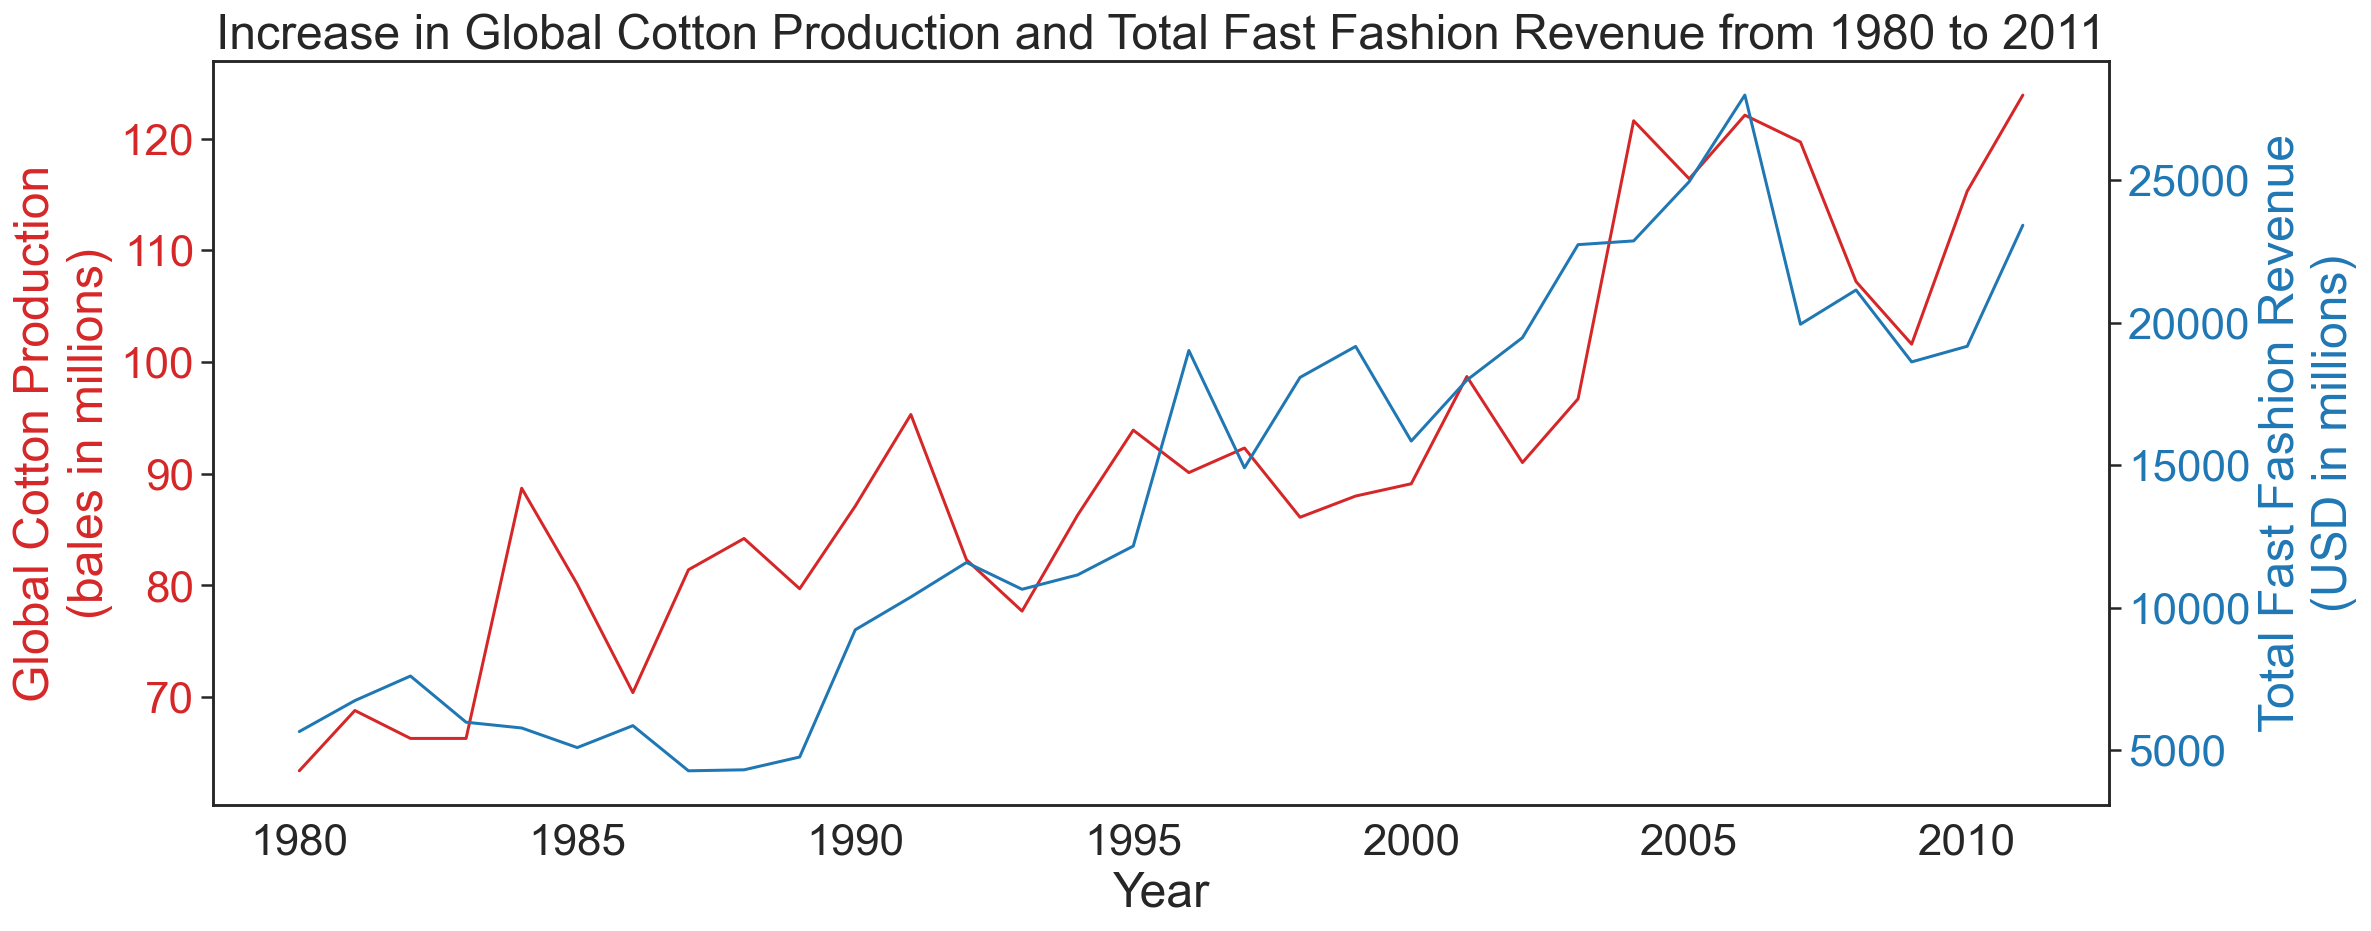

In [18]:
production_total_ff_rev, production = plt.subplots()

color = 'tab:red'
production.set_xlabel('Year')
production.set_ylabel('Global Cotton Production\n(bales in millions)', color=color)
production.plot(df_final.Year, df_final.Cotton_Production, color=color)
production.tick_params(axis='y', labelcolor=color)
plt.title('Increase in Global Cotton Production and Total Fast Fashion Revenue from 1980 to 2011')

total_ff_rev = production.twinx()

color = 'tab:blue'
total_ff_rev.set_ylabel('Total Fast Fashion Revenue\n(USD in millions)', color=color)
total_ff_rev.plot(df_final.Year, df_final.Total_Fast_Fashion_Revenue, color=color)
total_ff_rev.tick_params(axis='y', labelcolor=color)

production_total_ff_rev.tight_layout()
plt.show()

The line graph above shows that Total Fast Fashion Revenue and Cotton Production seem to rise at similar rates beginning between 1990 and 1995. Now let's perform EDA to see how strong the relationship is! 

## Explore Relationship Between Average Fast Fashion Revenue and Cotton Production
Create exploratory plots for Average Fast Fashion Revenue and Cotton Production where each point represents one year of data, including data between 1980 and 2011.

### Exploratory Plot

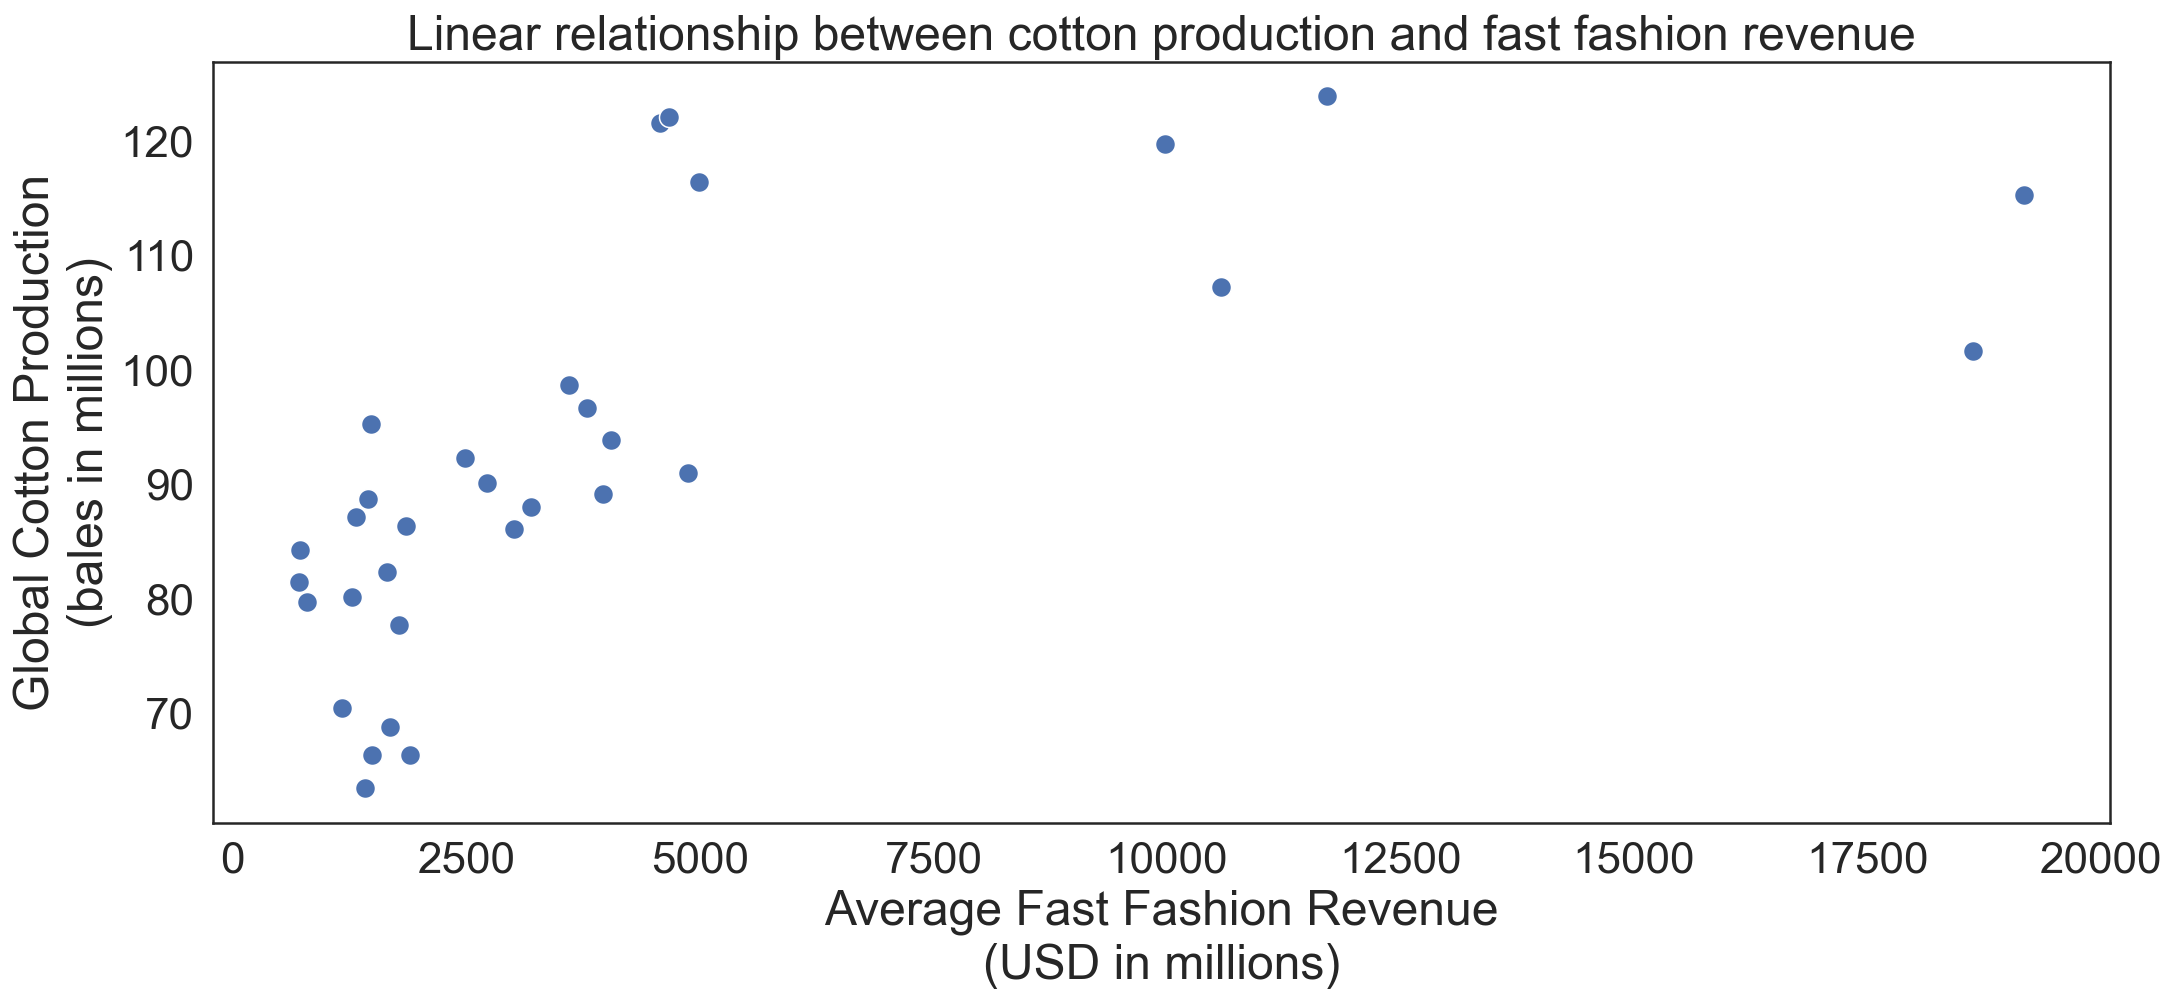

In [19]:
# exploratory plot for average fast fashion revenue and cotton production
sns.scatterplot(x='Average_Fast_Fashion_Revenue', y='Cotton_Production', data=df_final, s=100)
plt.ylabel('Global Cotton Production\n(bales in millions)')
plt.xlabel('Average Fast Fashion Revenue\n(USD in millions)')
plt.title("Linear relationship between cotton production and fast fashion revenue")
plt.show()

For the purposes of our analysis, this relationship is positively linear. We also see that two data points are farther from the rest of the data points. These two outliers (average revenue between 17500 and 20000) represent the two years in which the average fast fashion revenue was especially high. From `df_final`, we can see that these two data points are from the only two years with one recorded fast fashion company (2009 and 2010).

### Check for Normal Distribution

Now let's check if our variables, Average Fast Fashion Revenue and Cotton Production, are normally distributed.

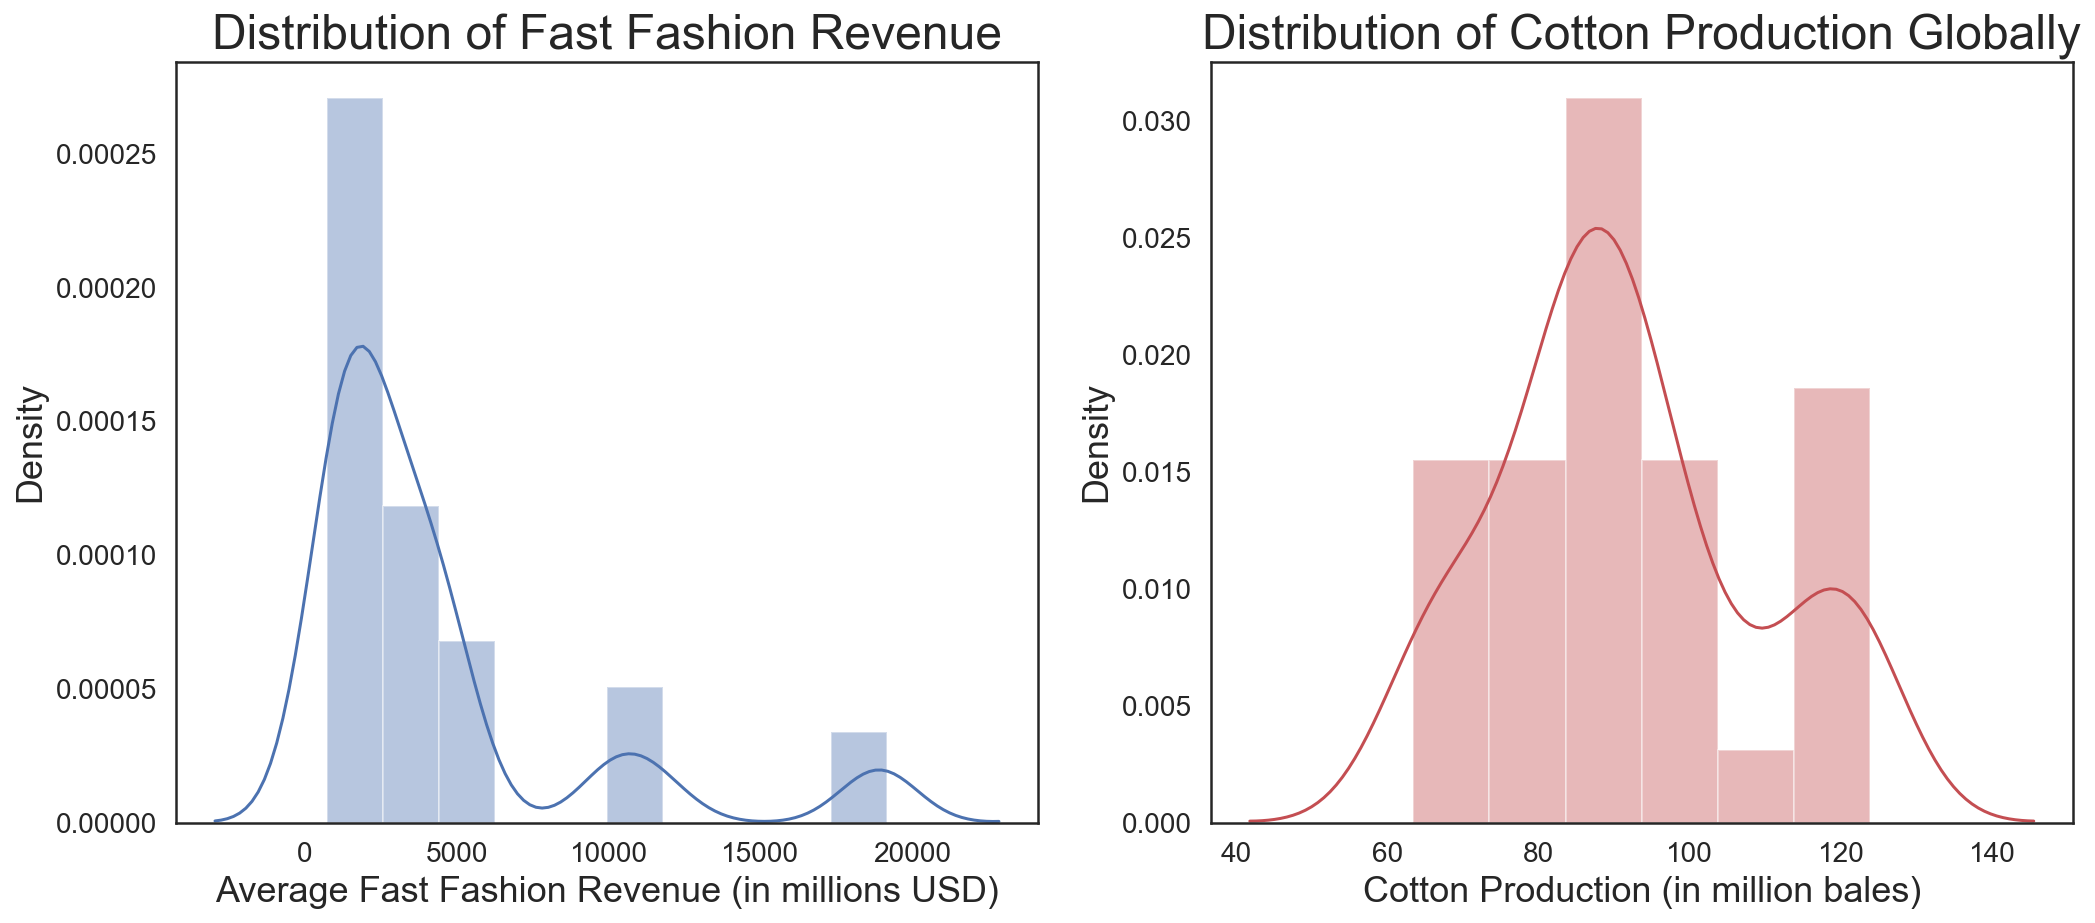

In [20]:
plt.subplot(1, 2, 1)
sns.distplot(df_final['Average_Fast_Fashion_Revenue'])
plt.title('Distribution of Fast Fashion Revenue')
plt.xlabel('Average Fast Fashion Revenue (in millions USD)', fontsize = 18)
plt.ylabel('Density', fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

plt.subplot(1, 2, 2)
sns.distplot(df_final['Cotton_Production'], color='r')
plt.title('Distribution of Cotton Production Globally')
plt.xlabel('Cotton Production (in million bales)', fontsize = 18)
plt.ylabel('Density', fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

The plots above show that Cotton Production is roughly normally distributed, but Average Fast Fashion Revenue is shows a right skewed distribution. Because of this, we will need to apply a log transformation. This will allow us to perform our analysis with our data fitting the correct assumptions for the linear regression model. 

### Log Transformation of Average Fast Fashion Revenue

Text(0.5, 1.0, 'Log Transformation of Avg Fast Fashion Revenue')

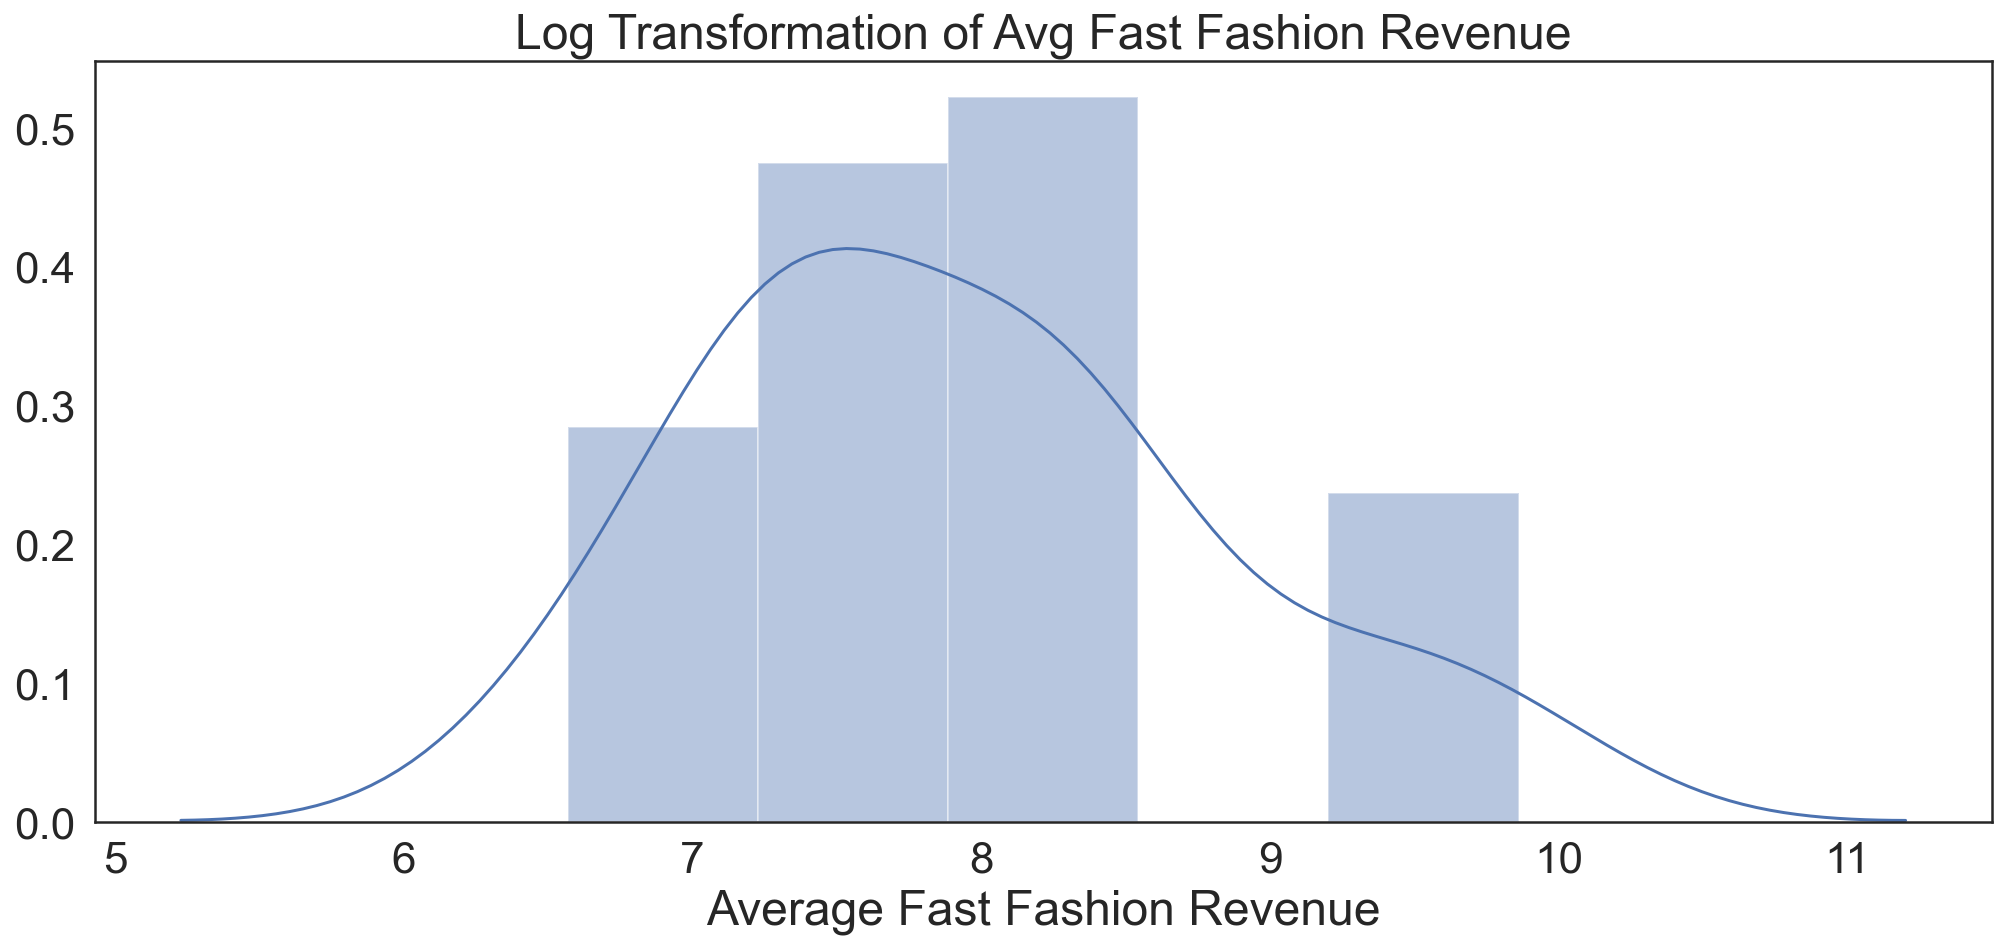

In [21]:
# perform log transformation and assign data to new column in df
df_final['Avg_FF_Rev_Log_Dist'] = np.log(df_final['Average_Fast_Fashion_Revenue'])

sns.distplot(df_final['Avg_FF_Rev_Log_Dist'])
plt.xlabel('Average Fast Fashion Revenue')
plt.title('Log Transformation of Avg Fast Fashion Revenue')

After a log transformation, the data is now more normally distributed. Therefore, we can continue with our analysis. 

### Linear Regression Model

Given our research question, we want to determine whether a change in one variable (average fast fashion revenue) is related to the change in another variable (global cotton production). Because we are interested in their relationship, a linear regression model is fitting. Here are the results of our OLS Regression Model.

In [22]:
outcome_4, predictors_4 = patsy.dmatrices('Cotton_Production ~ Avg_FF_Rev_Log_Dist', df_final)
mod_4 = sm.OLS(outcome_4, predictors_4)

res_4 = mod_4.fit()


print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Cotton_Production   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     38.33
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           8.17e-07
Time:                        14:20:46   Log-Likelihood:                -122.72
No. Observations:                  32   AIC:                             249.4
Df Residuals:                      30   BIC:                             252.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -23.6123    

### OLS Regression Results Analysis

These results show that if Average Fast Fashion Revenue (log transformed) is 0, then Global Cotton Production would be -23.6123. For every 1 unit increase in the log transformed Average Fast Fashion Revenue, we expect a 14.5167 increase in Cotton Production.

The P-value [Prob (F-Statistic)] is shown as 8.17e-07, which indicates that the null hypothesis is unlikely to be true.

The strength of the correlation is moderatly strong (Correlation Coefficient = 0.748), which we obtained by taking the square root of the given R-squared value (0.561). 

Based on these values from the tables, it seems that the Average Fast Fashion Revenue predicts Cotton Production.

### Plot of Model Fit Line
Here, we have plotted the original data along with the model fit line from our OLS Regression Results.

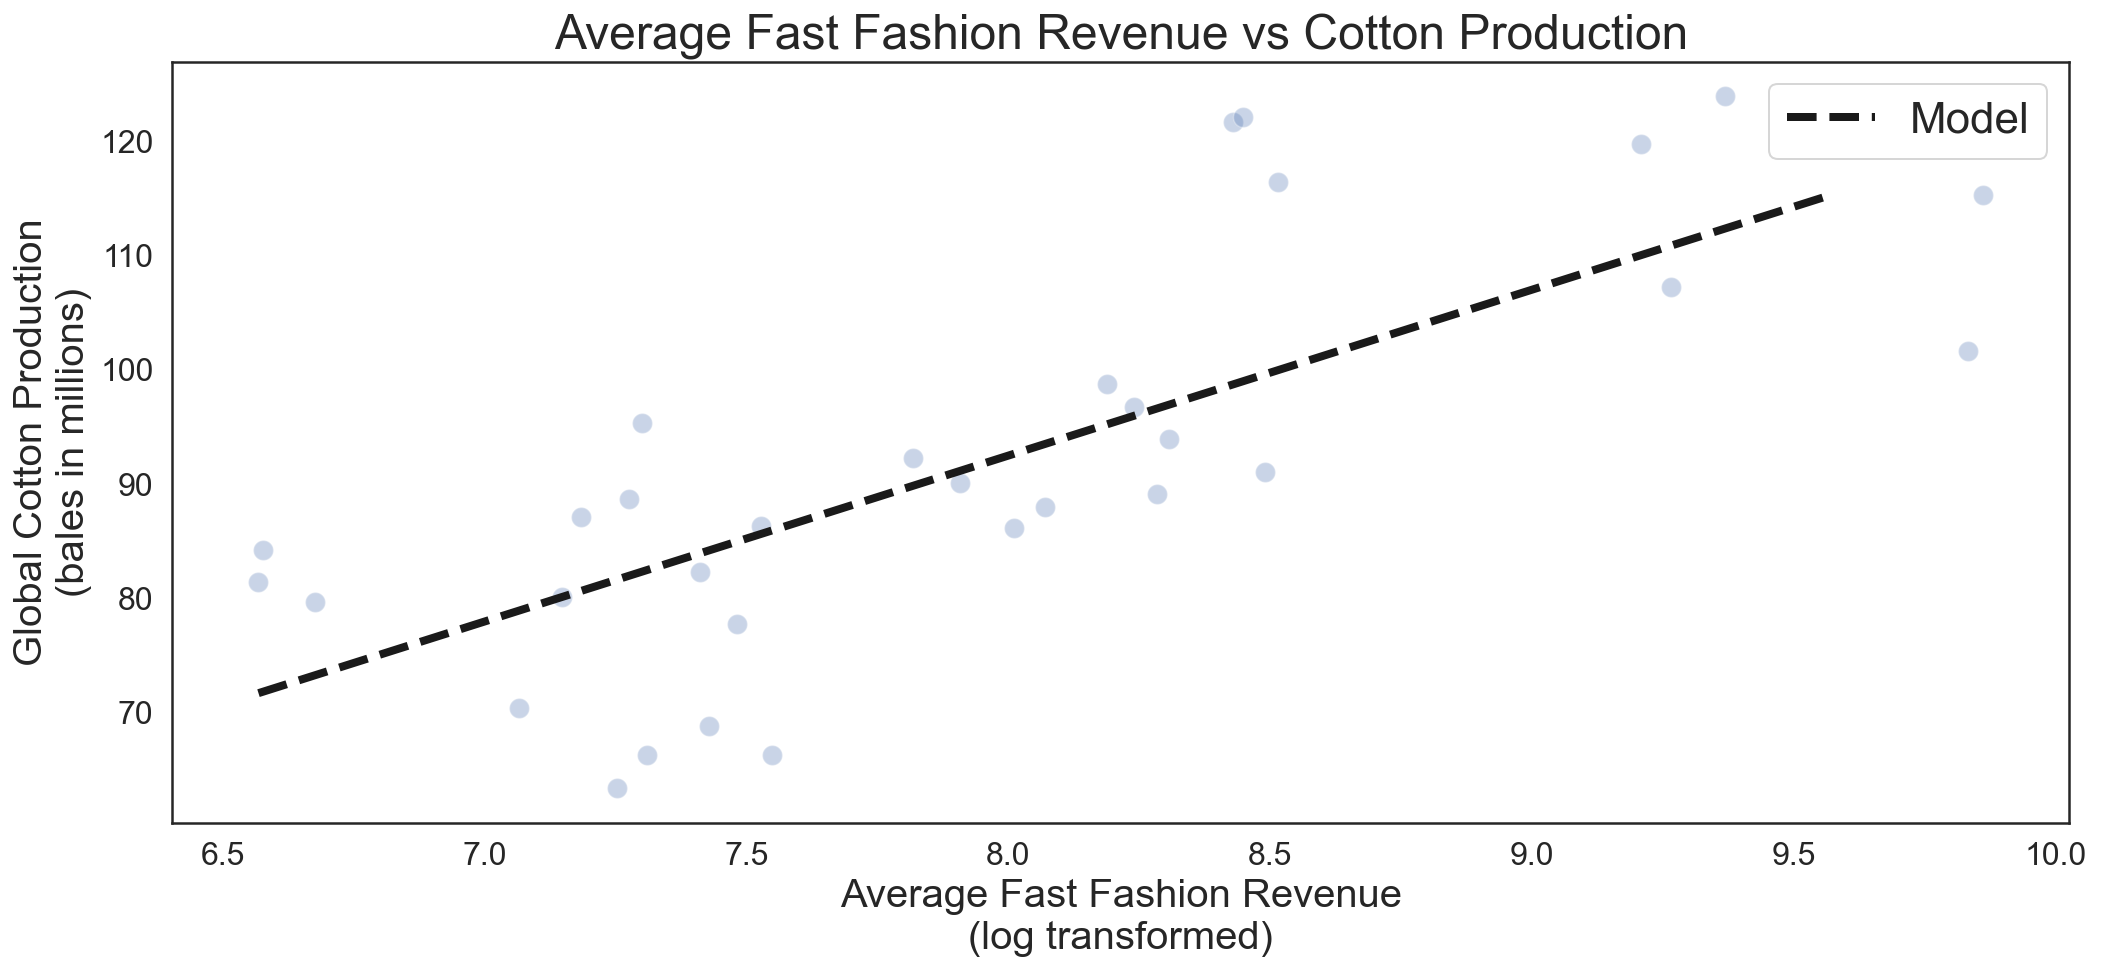

In [23]:
sns.scatterplot(x='Avg_FF_Rev_Log_Dist', y='Cotton_Production', alpha=0.3, data=df_final, s=100)

# the model fit line
xs_4 = np.arange(df_final['Avg_FF_Rev_Log_Dist'].min(), df_final['Avg_FF_Rev_Log_Dist'].max())
ys_4 = 14.51 * xs_4 -23.6123
plt.plot(xs_4, ys_4, '--k', linewidth=4, label='Model')

plt.title('Average Fast Fashion Revenue vs Cotton Production')
plt.xlabel('Average Fast Fashion Revenue\n(log transformed)', fontsize = 20)
plt.ylabel('Global Cotton Production\n(bales in millions)', fontsize = 20)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend()

The plot above illustrates the clear linear and positive relationship between average fast fashion revenue and global cotton production. While these results do indicate that our hypothesis is likely to be true (reject the null hypothesis because the p-value is much less than alpha = 0.05), we want to check if our results are specific to fast fashion companies or rather, to all apparel companies.

Now to check, we will conduct an analysis between Average Revenue for all apparel companies and Global Cotton Production. 

## Explore Relationship Between Average Apparel Revenue and Cotton Production

### Exploratory plot 
Let's plot our variables to check of relationship is linear. Each point indicates the relationship between Global Cotton Production and Total Apparel Revenue by year. 

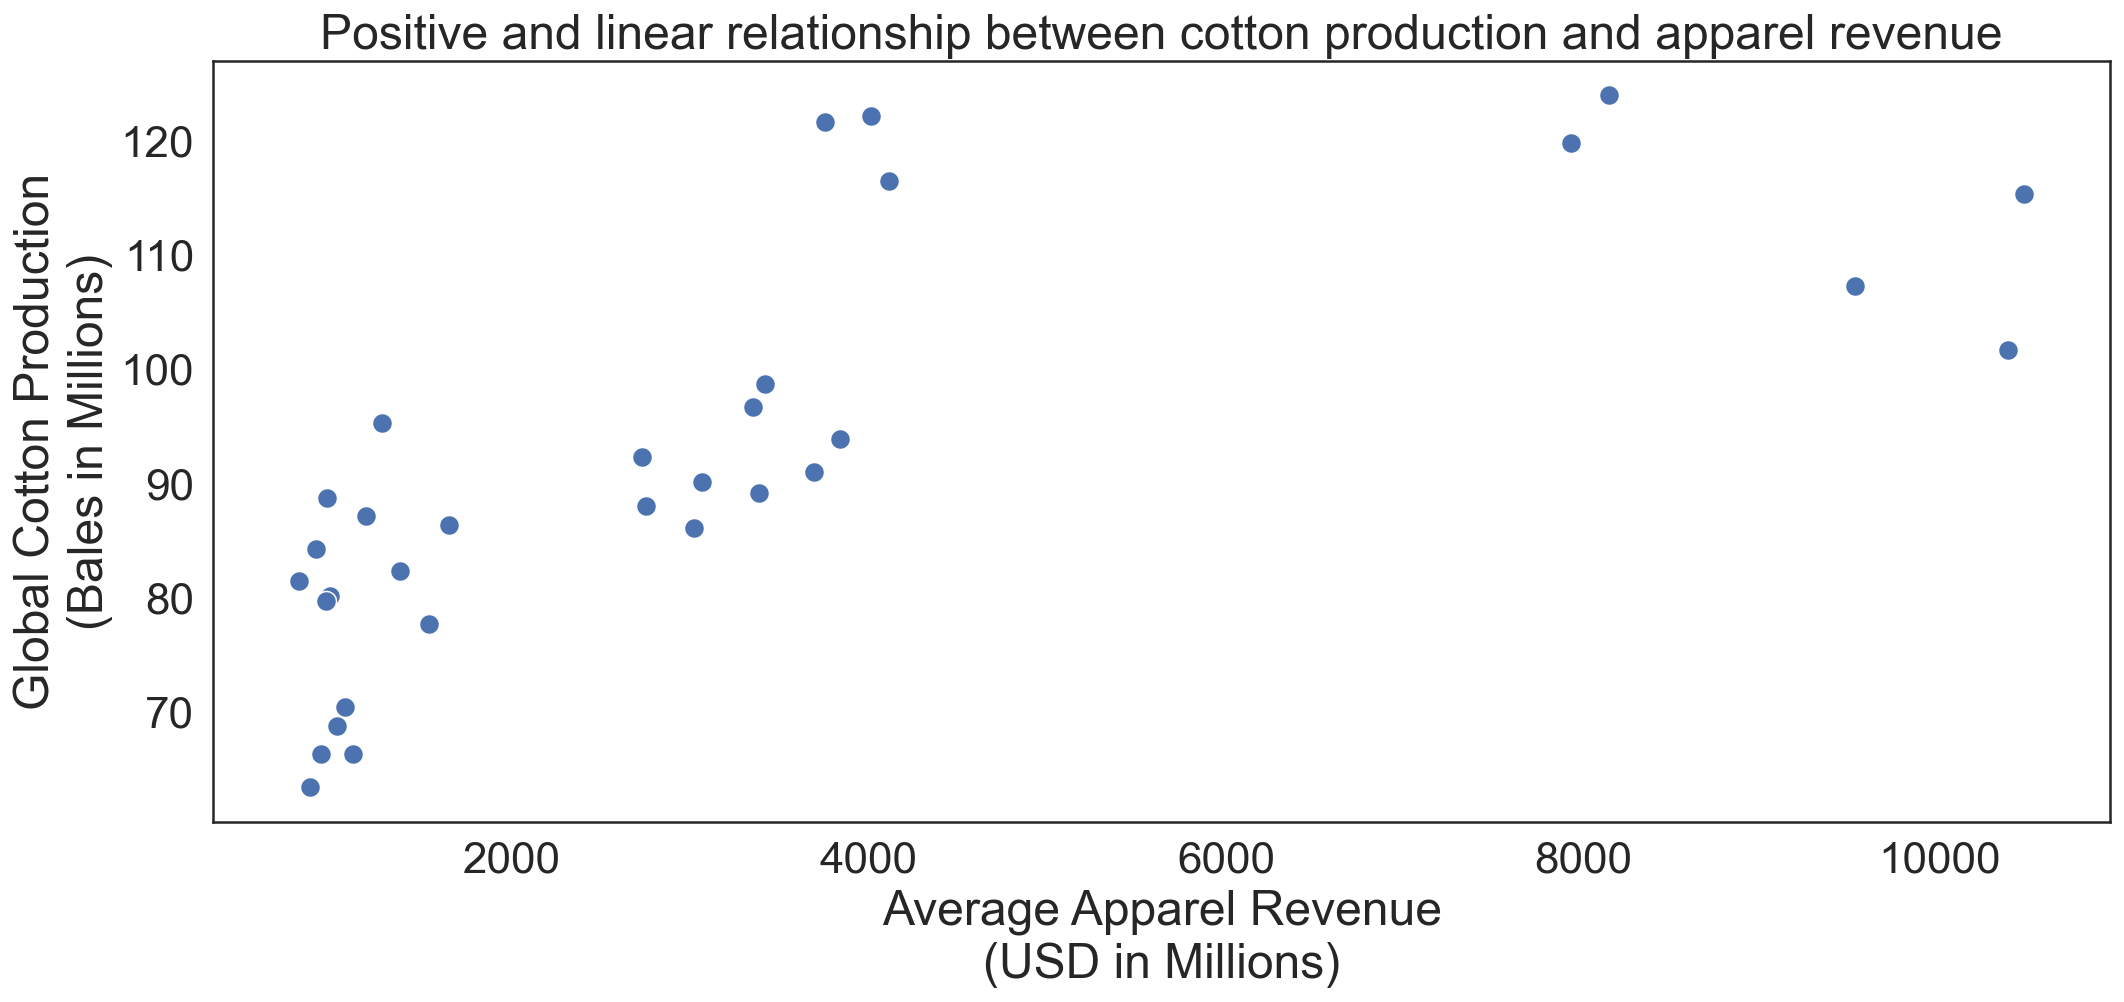

In [24]:
sns.scatterplot(x='Average_Apparel_Revenue', y='Cotton_Production', data=df_final, s=100)
plt.xlabel('Average Apparel Revenue\n(USD in Millions)')
plt.ylabel('Global Cotton Production\n(Bales in Millions)');
plt.title('Positive and linear relationship between cotton production and apparel revenue')
plt.show()

For the purposes of our analysis, we can see that this relationship is linear and positive. That is, as average apparel revenue increases, global cotton production also increases.

### Check for Normal Distribution

We will again be applying a linear regression model to our data. So, we need to check to see if the distributions for average apparel revenue and global cotton production are normal.

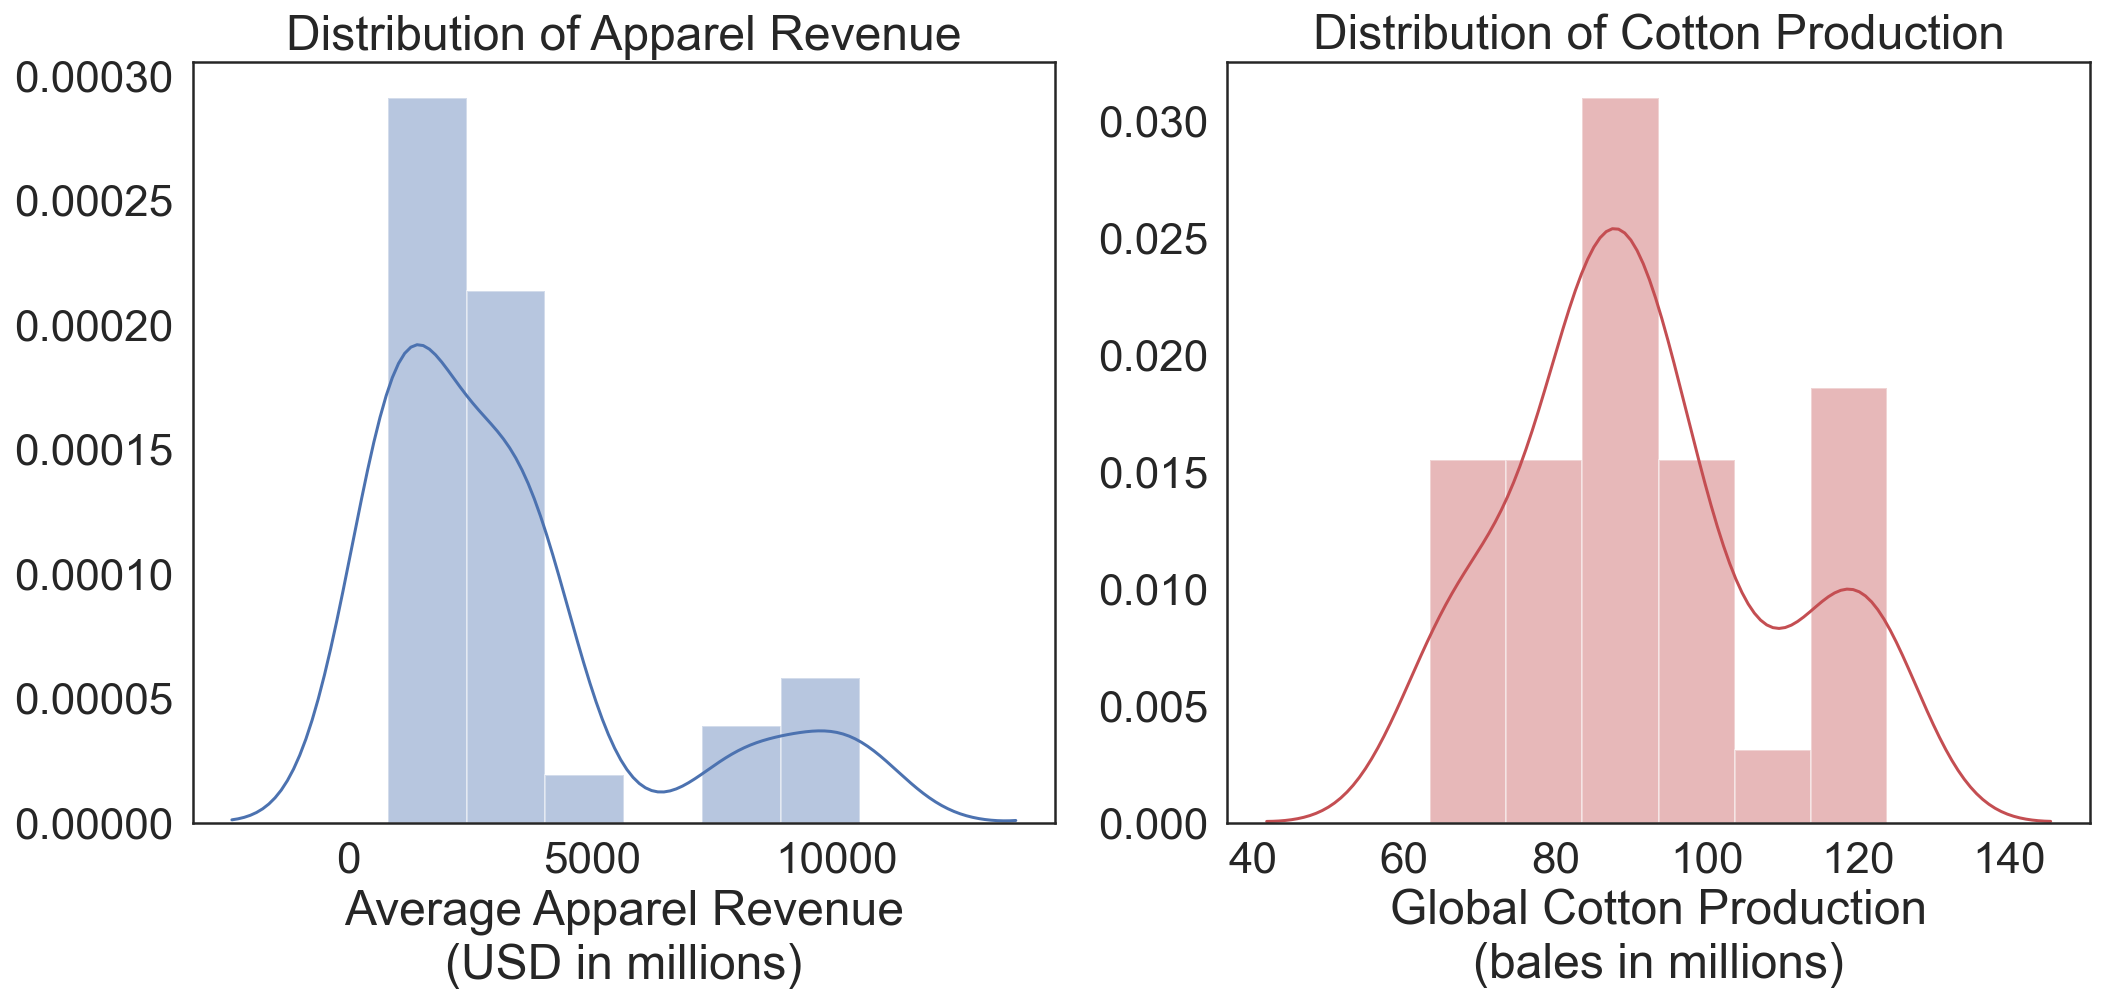

In [25]:
plt.subplot(1, 2, 1)
sns.distplot(df_final['Average_Apparel_Revenue'])
plt.xlabel('Average Apparel Revenue\n(USD in millions)')
plt.title('Distribution of Apparel Revenue')

plt.subplot(1, 2, 2)
sns.distplot(df_final['Cotton_Production'], color='r')
plt.xlabel('Global Cotton Production\n(bales in millions)')
plt.title('Distribution of Cotton Production')
plt.show()

Again, the distribution of global cotton production appears to be roughly normal. However, it seems the distribution of Average Apparel Revenue is right skewed. We will apply a log transformation to this data so we can proceed with our anaylsis.

### Log Transformation of Average Apparel Revenue

Text(0.5, 0, 'Average Apparel Revenue')

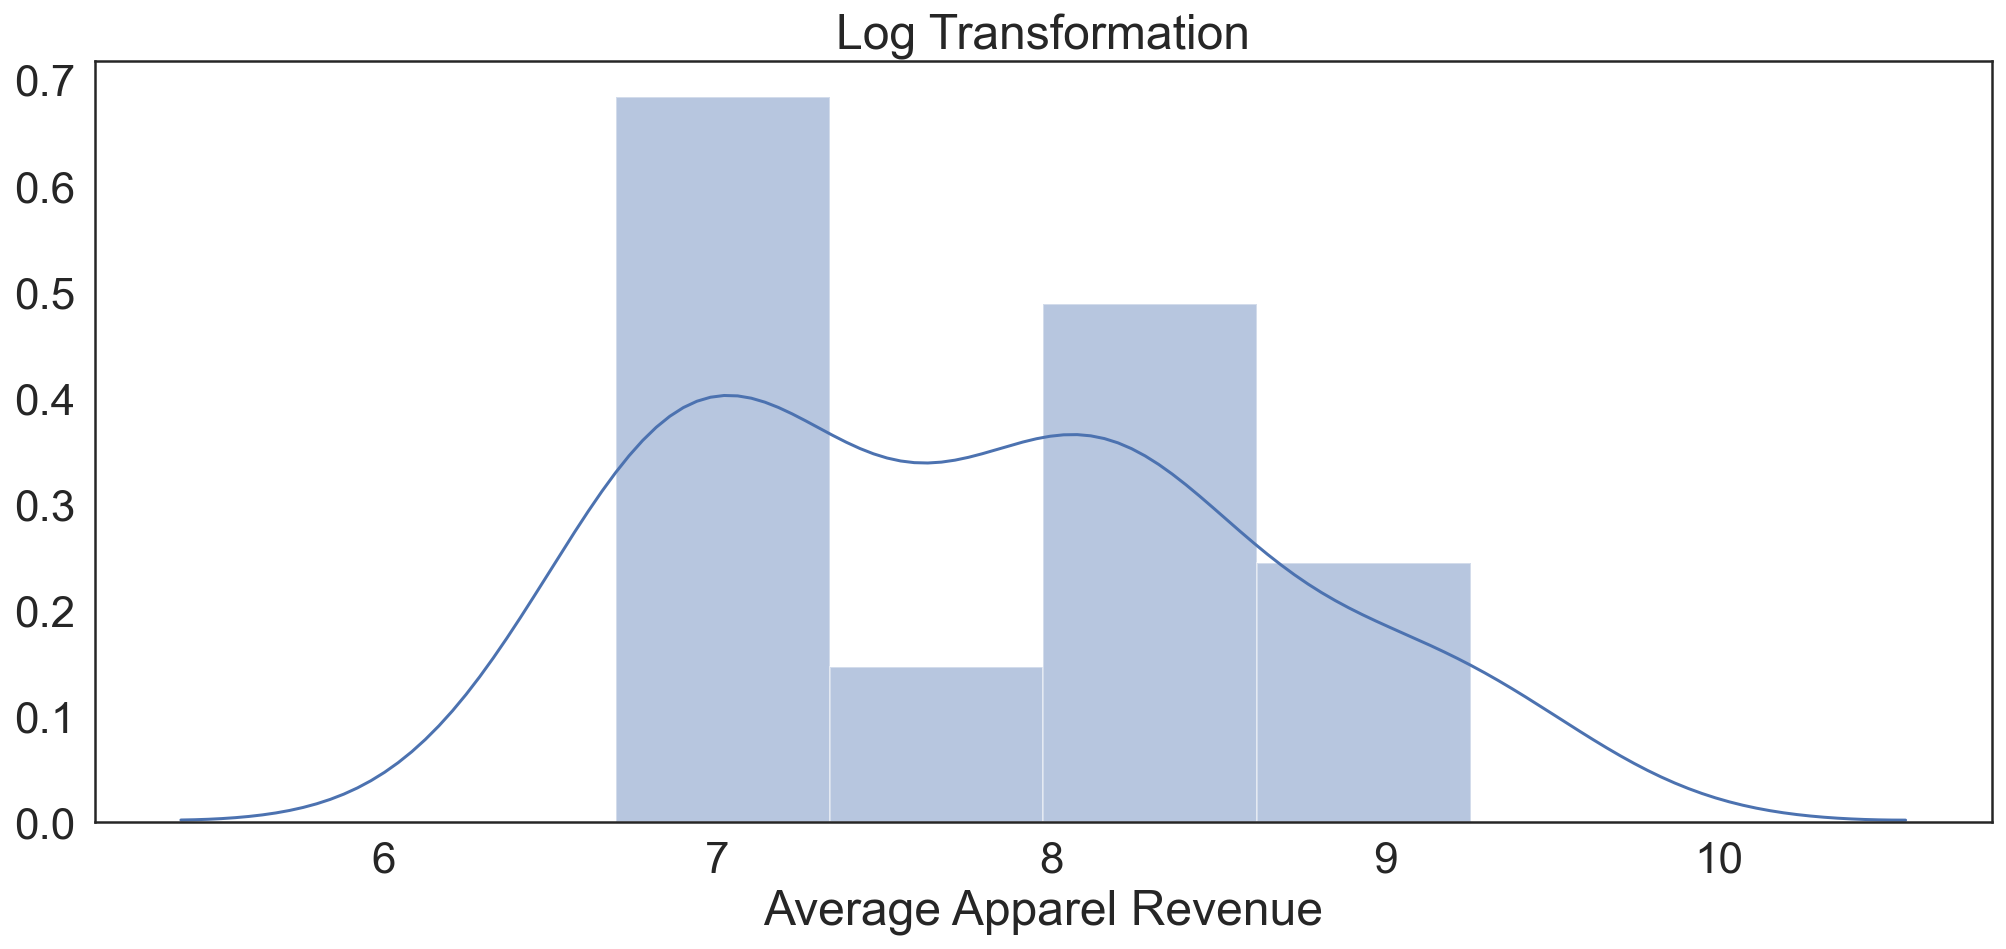

In [26]:
# apply log transformation then assign data to new column in df
df_final['Avg_Apparel_Rev_Log_Dist'] = np.log(df_final['Average_Apparel_Revenue'])
sns.distplot(df_final['Avg_Apparel_Rev_Log_Dist'])
plt.title('Log Transformation')
plt.xlabel('Average Apparel Revenue')

After applying a log transformation, Average Apparel Revenue became more normally distributed. Therefore, we can continue with our analysis. 

### Linear Regression Model

Below are the results of our OLS Regression Model. 

In [27]:
outcome_3, predictors_3 = patsy.dmatrices('Cotton_Production ~ Avg_Apparel_Rev_Log_Dist', df_final)
mod_3 = sm.OLS(outcome_3, predictors_3)

res_3 = mod_3.fit()

print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Cotton_Production   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     57.52
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           1.86e-08
Time:                        14:20:49   Log-Likelihood:                -118.76
No. Observations:                  32   AIC:                             241.5
Df Residuals:                      30   BIC:                             244.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### OLS Regression Results Analysis

These results show that if the (log transformed) Average Apparel Revenue is 0, then Global Cotton Production would be -39.9296. For every 1 unit increase in the (log transformed) Average Apparel Revenue, we can expect a 16.97 increase in Global Cotton Production. <p>The P-value (Prob(F-Statistic)) is shown as 1.86e-08, which indicates that the null hypothesis is unlikely to be true. <p>

Based on these values from the tables, it seems that the Average Apparel Revenue predicts Global Cotton Production stronger than Average Fast Fashion Revenue does.

The R-squared value is shown as 0.657, and we took the square root of that value to find the R-value. 
We found that the R-value (correlation coefficient) is 0.811, which indicates a very strong correlation.

### Plot of Model Fit Line
Below is a plot of the original data along with the model fit line from our OLS Regression Results.

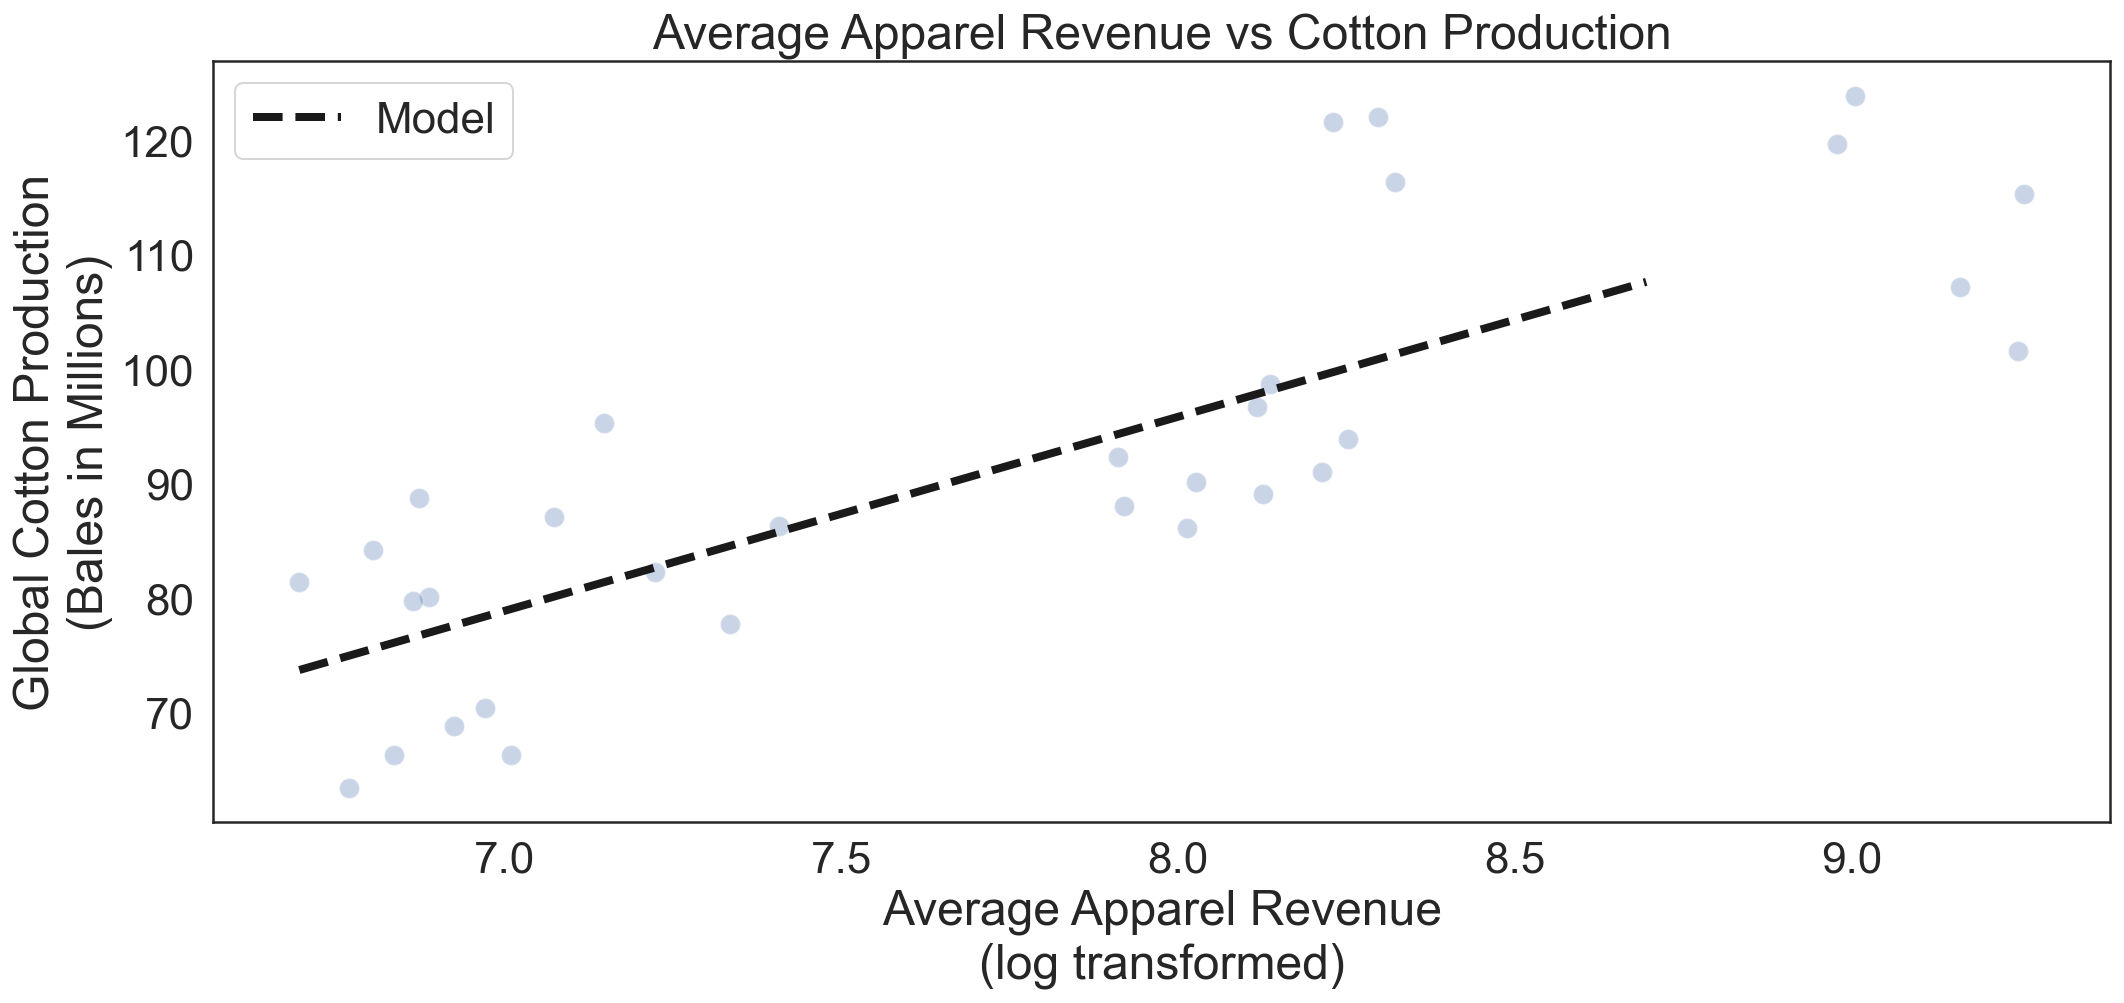

In [28]:
sns.scatterplot(x='Avg_Apparel_Rev_Log_Dist', y='Cotton_Production', alpha=0.3, data=df_final, s=100)

# model fit line
xs_3 = np.arange(df_final['Avg_Apparel_Rev_Log_Dist'].min(), df_final['Avg_Apparel_Rev_Log_Dist'].max())
ys_3 = 16.97 * xs_3 - 39.92
plt.plot(xs_3, ys_3, '--k', linewidth=4, label='Model')

plt.title('Average Apparel Revenue vs Cotton Production')
plt.xlabel('Average Apparel Revenue\n(log transformed)')
plt.ylabel('Global Cotton Production\n(Bales in Millions)')
plt.legend()

Like the plot between average fast fashion revenue and global cotton production, the plot above also shows a linear and positive relationship between average apparel revenue and global cotton production. Comparing the correlation coefficient for the two relationships, the correlation between average apparel revenue and global cotton production (0.811) is stronger than that of average fast fashion revenue (0.748).

# Ethics and Privacy 

The data sets we used are publicly available through the USDA’s official website and Fortune websites. The USDA’s website is a government website that provides data to the public for free. Regarding privacy, the datasets we used do not contain sensitive personal information and therefore do not infringe on any person’s privacy. Some biases that could be present in our analysis would come from our method of defining companies as fast fashion.

Fast Fashion has many definitions such as the timing of design to store processes or the sustainability of the practices companies partake in, to manufacture their items. For our study, we decided to classify companies based on their sustainability and design practices.

From our analysis, the results could have baises that stem from: 
Our data not taking into consideration companies that didn’t make it to the Fortune 500 list which isn’t representative since the majority of these companies are fast fashion companies and have the most effect on cotton production globally.

Our data does not break down the percentage of cotton production that is used for apparel. This can be misleading because viewers may assume that the cotton production we are tracking is solely for use in apparel. 

# Conclusion

Our goal for this project was to identify a relationship between global cotton production and the success of fast fashion companies. We landed on this topic because of fast fashion’s large presence in our modern society-- with many of its negative consequences to our environment and the industry’s workers, such as cotton farmers, being hidden from consumers. We hope to highlight the massive impacts of this industry.

We hypothesized that as the average revenue of fast fashion companies increased, so would global cotton production. Specifically, this relationship would become stronger in the 1990s when the fast fashion business model began to rise in popularity. Through a simple line graph comparing trends between global cotton production and total fast fashion revenue, we saw that the two became more closely related starting between 1990 and 1995. Although this visual agreed with our hypothesis, we did not have enough evidence to conclude that the relationship specifically began in the 1990s.

## Results

After cleaning our data sets, we analyzed the data through the use of a linear regression model, using global cotton production as the outcome. We looked at its relationship between two different predictors: average fast fashion revenue and average apparel revenue. The average fast fashion revenue accounts for all fast fashion companies included in the Fortune 500 lists by year from 1980 to 2011. From our model, we observed that average fast fashion revenue and global cotton production are correlated by an r-value of 0.749. We consider this correlation to be strong enough to say that the average fast fashion revenue does predict global cotton production. While this is great for hypothesis, we wanted to see if our results were specific to fast fashion companies. 
Next, we applied the linear regression model to the average revenue for all apparel companies listed in Fortune 500 lists (1980 - 2011) to see if our findings were specific to fast fashion companies alone. This model showed a slightly stronger correlation of 0.811. While our data did show a moderately strong relationship between the success of fast fashion companies and global cotton production, there was an even greater correlation between the success of all apparel companies in our dataset.

To answer our research question simply: yes, the success fast fashion companies have a moderately strong effect on global cotton production, but we found that the success of all apparel companies is a stronger predictor for global cotton production.

## Limitations

Although we tried to minimize the number of confounding variables, there were still some limitations. Many popular fast fashion companies like Forever 21, were not included in the Fortune 500 lists, making our list non-exhaustive. Our analysis may not be generalizable due to our limited lists of fast fashion companies. We were also not able to collect data on exactly which countries each company imports their cotton from, which prevented us from deeply analyzing the relationship between fast fashion companies' specific effect on the increase in cotton production. Additionally, we defined the success of a company by looking at their total revenue per year, which is reasonably definitive; however, success could entail many other components, like customer satisfaction, how long its products are on the market, etc. Our measure of success-- average revenue-- was summarized for each year by taking the average of total revenue by the number of companies in that year. This method could be a limitation to our results as it is not 100% accurate of revenue for each year. We also did not take into account inflation or other economic factors, like the 2008 recession, which could be the cause for increasing average revenue over time and common trends between variables, respectively.

## Final Thoughts

With analyzing the growth of the fast fashion industry and understanding its impact on the environment is essential in educating the gen pop to:

1. use their consumer buying power to support ethical and sustainable companies and
2. advocate for major fashion brands to move towards sustainable practices.

Fast fashion companies not only have negative impacts on the environment; they also infringe upon worker rights issues. The majority of fast fashion manufacturers are overseas as they are seen as a cheap workforce, workers are not paid a liveable wage, and often work in inhumane conditions.

# Team Contributions

Each team member was assigned a specific portion of the report to write:
- Amanda Ahn: datasets
- Hannah Contreras: background, prior work
- Bella Liang: data cleaning
- Yelitza Mendez: data and privacy, label fast fashion companies
- Sarah Nobleza: hypothesis, label fast fashion companies

We all contributed equally for the data analysis portion and we all contributed to writing the conclusion.